<a href="https://colab.research.google.com/github/mariatomy9/Major-Project/blob/lena/Kaggletry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Similarity Between Songs Using Audio Features**

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt, seaborn as sns

import librosa, librosa.display
import IPython.display as ipd

plt.rcParams['figure.figsize'] = (10, 3)

# from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing
from scipy.spatial.distance import cdist

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/features_30_sec.csv')

features = data.iloc[:,2:-1]
features_scaled=preprocessing.scale(features)

features.describe().T

,count,mean,std,min,25%,50%,75%,max
chroma_stft_mean,1000.0,3.786817e-01,8.170489e-02,1.719392e-01,0.319562,3.831479e-01,4.359417e-01,6.636847e-01
chroma_stft_var,1000.0,8.633982e-02,7.735298e-03,4.455525e-02,0.082298,8.661463e-02,9.125551e-02,1.081115e-01
rms_mean,1000.0,1.309297e-01,6.568311e-02,5.276444e-03,0.086657,1.224431e-01,1.756822e-01,3.979734e-01
rms_var,1000.0,3.051399e-03,3.634500e-03,4.294372e-06,0.000942,1.816440e-03,3.577055e-03,2.767948e-02
spectral_centroid_mean,1000.0,2.201781e+03,7.159606e+02,5.700404e+02,1627.697311,2.209263e+03,2.691295e+03,4.435244e+03
spectral_centroid_var,1000.0,4.696916e+05,4.008995e+05,7.911251e+03,184350.530174,3.384862e+05,6.121479e+05,3.036843e+06
spectral_bandwidth_mean,1000.0,2.242541e+03,5.263165e+02,8.980662e+02,1907.240605,2.221393e+03,2.578470e+03,3.509646e+03
spectral_bandwidth_var,1000.0,1.370792e+05,9.645567e+04,1.078719e+04,67376.554428,1.119775e+05,1.823716e+05,6.947848e+05
rolloff_mean,1000.0,4.571549e+03,1.574792e+03,7.491406e+02,3380.069642,4.658524e+03,5.533810e+03,8.677673e+03
rolloff_var,1000.0,1.844345e+06,1.425085e+06,1.468612e+04,772731.230777,1.476115e+06,2.555262e+06,8.660900e+06


In [ ]:
distances = cdist(features_scaled, features_scaled, 'cosine') #cosine distance

dist_df = pd.DataFrame(distances)
dist_df = dist_df.set_index(data.filename)
dist_df.columns = data.filename
dist_df

filename,blues.00000.wav,blues.00001.wav,blues.00002.wav,blues.00003.wav,blues.00004.wav,blues.00005.wav,blues.00006.wav,blues.00007.wav,blues.00008.wav,blues.00009.wav,...,rock.00090.wav,rock.00091.wav,rock.00092.wav,rock.00093.wav,rock.00094.wav,rock.00095.wav,rock.00096.wav,rock.00097.wav,rock.00098.wav,rock.00099.wav
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,0.000000,0.950769,0.410382,0.715138,0.974439,1.346688,1.219483,1.167626,0.358123,1.097889,...,1.082829,0.453831,0.421442,0.337410,0.428371,0.389058,0.359165,0.503706,7.150424e-01,0.695902
blues.00001.wav,0.950769,0.000000,1.096834,0.479097,0.919251,0.692144,0.681714,0.584742,0.879351,0.595832,...,1.098111,1.325126,1.370792,1.191698,1.330834,1.077301,1.222119,1.302573,5.004378e-01,0.688277
blues.00002.wav,0.410382,1.096834,0.000000,0.789589,0.599734,1.082019,1.028061,0.895554,0.531887,1.132532,...,1.032408,0.438926,0.409221,0.416707,0.485463,0.504293,0.433163,0.410017,7.836224e-01,0.678931
blues.00003.wav,0.715138,0.479097,0.789589,0.000000,0.873563,0.865204,0.699254,0.675434,0.647242,0.704816,...,1.320107,1.206516,1.151132,0.958014,1.172515,1.000287,0.979485,1.107821,4.977214e-01,0.816790
blues.00004.wav,0.974439,0.919251,0.599734,0.873563,0.000000,0.443934,0.517805,0.376545,0.970297,0.528343,...,0.912395,0.982634,0.861965,0.895316,1.034594,0.936546,0.936454,0.827056,8.468076e-01,0.938215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rock.00095.wav,0.389058,1.077301,0.504293,1.000287,0.936546,1.231012,1.251086,1.180628,0.380550,1.258421,...,0.976074,0.156273,0.148274,0.139406,0.148544,0.000000,0.097936,0.134759,6.501304e-01,0.477517
rock.00096.wav,0.359165,1.222119,0.433163,0.979485,0.936454,1.272209,1.291506,1.256171,0.387830,1.304636,...,1.033826,0.128774,0.117175,0.119638,0.136938,0.097936,0.000000,0.097929,6.621657e-01,0.527669
rock.00097.wav,0.503706,1.302573,0.410017,1.107821,0.827056,1.175960,1.203014,1.155732,0.538680,1.330066,...,1.008336,0.085830,0.073442,0.102346,0.121149,0.134759,0.097929,0.000000,7.128432e-01,0.584827


In [ ]:
def songs_similarity(song_name, features, metric='cosine'):
    distances = cdist(features, features, metric=metric)
    dist_df = pd.DataFrame(distances)
    dist_df = dist_df.set_index(data.filename)
    dist_df.columns = data.filename
    series = dist_df[song_name].sort_values(ascending = True)
    series = series.drop(song_name)
    return series

In [ ]:
audio_path = '/content/drive/MyDrive/Data/genres_original'
song_name = 'classical.00077.wav'
sim_songs = songs_similarity(song_name, features_scaled)
sim_songs

filename
classical.00079.wav    0.163032
classical.00065.wav    0.192554
classical.00035.wav    0.232339
classical.00066.wav    0.266772
classical.00058.wav    0.272568
                         ...   
metal.00053.wav        1.609674
metal.00051.wav        1.623948
metal.00087.wav        1.627464
disco.00003.wav        1.628881
metal.00078.wav        1.676451
Name: classical.00077.wav, Length: 999, dtype: float64

 **Music Genre Classification - Deep Learning**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob # allows us to list all files to a directory
import IPython
import IPython.display as ipd # to play the Audio Files

import librosa # main package for working with Audio Data
import librosa.display

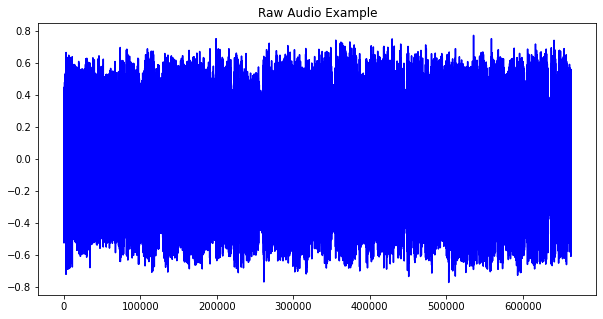

In [ ]:
audio_files = glob("/content/drive/MyDrive/Data/genres_original/*/*.wav")
y, sr = librosa.load(audio_files[0])
pd.Series(y).plot(figsize=(10,5), title="Raw Audio Example", color='blue');


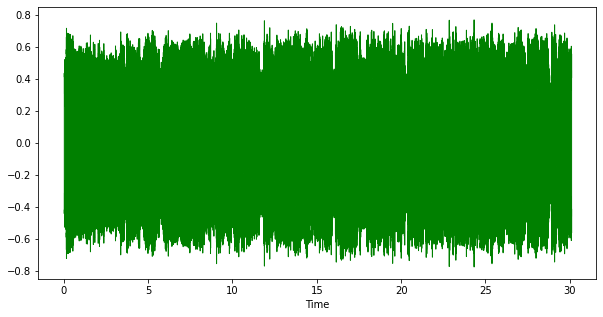

In [ ]:
#same as above
plt.figure(figsize=(10,5))
librosa.display.waveshow(y, color = "Green")
plt.show()

In [ ]:
# Use STFT on raw audio data
D = librosa.stft(y)
# convert from aplitude to decibel values by taking the absolute value of D in reference what the max value would be
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# see the shape of transformed data
print("New shape of transformed data", S_db.shape)

New shape of transformed data (1025, 1296)


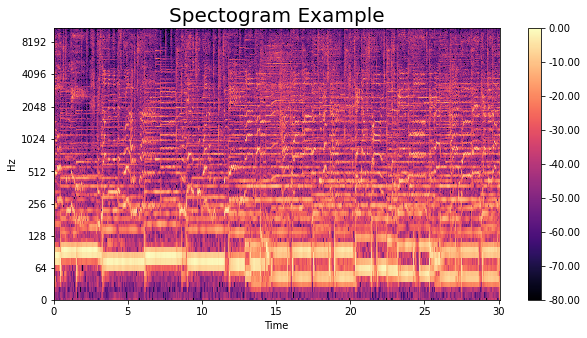

In [ ]:
# plot transformed data as spectogram
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f');

In [ ]:
# apply mel spectogram without STFT
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128*2)
print("Shape of Mel Spectogram", S.shape)
# use that converting function as above
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

Shape of Mel Spectogram (256, 1296)


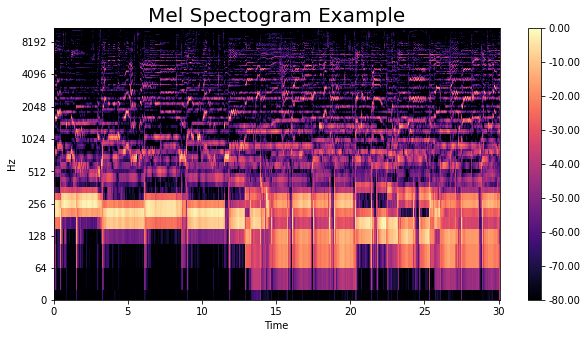

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f');

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/features_3_sec.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

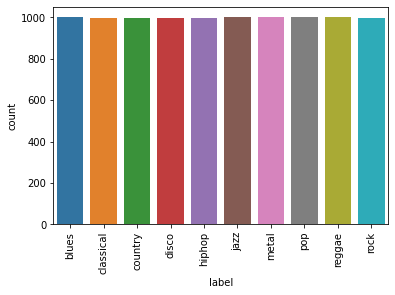

In [ ]:
df.info() # infos about the samples, features and datatypes
df.isnull().sum() # checking for missing values
sns.countplot(x=df.label) # plot the categories
plt.xticks(rotation=90);

In [ ]:
df = df.drop(labels='filename',axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()
data = df.iloc[:, :-1]

In [ ]:
labels = df.iloc[:, -1] # get labels column
labels.to_frame()

# assign x and y, scale x and encode y
x = np.array(data, dtype = float)
x = scaler.fit_transform(data)
y = encoder.fit_transform(labels)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    
# create an instance of each classification algorithm
g=GaussianNB()
b=BernoulliNB()
KN=KNeighborsClassifier()
D=DecisionTreeClassifier()
#XGB=XGBClassifier()

algos=[g,b,KN,D]
algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','DecisionTreeClassifier']
   
accuracy_scored=[]
    
# fit and predict for each Algo
for item in algos:
    item.fit(x_train,y_train)
    item.predict(x_test)
    accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))

In [ ]:
result = pd.DataFrame(accuracy_scored, columns=["Accuracy"])
result['Algos']=algo_names
result.sort_values('Accuracy',ascending=False)

,Accuracy,Algos
2,0.872005,KNeighborsClassifier
3,0.627237,DecisionTreeClassifier
0,0.515317,GaussianNB
1,0.467395,BernoulliNB


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(x_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax"),
    
])



In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
# fit model - training
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300, batch_size=128)
# evaluate model
_, accuracy = model.evaluate(x_test, y_test, batch_size=128)



Epoch 1/300
53/53 [==============================] - 3s 26ms/step - loss: 1.6655 - accuracy: 0.4086 - val_loss: 1.1545 - val_accuracy: 0.6021
Epoch 2/300
53/53 [==============================] - 1s 23ms/step - loss: 1.1666 - accuracy: 0.5941 - val_loss: 0.9057 - val_accuracy: 0.6909
Epoch 3/300
53/53 [==============================] - 1s 13ms/step - loss: 0.9479 - accuracy: 0.6706 - val_loss: 0.7613 - val_accuracy: 0.7470
Epoch 4/300
53/53 [==============================] - 1s 15ms/step - loss: 0.8033 - accuracy: 0.7272 - val_loss: 0.6912 - val_accuracy: 0.7622
Epoch 5/300
53/53 [==============================] - 1s 15ms/step - loss: 0.7211 - accuracy: 0.7532 - val_loss: 0.6286 - val_accuracy: 0.7843
Epoch 6/300
53/53 [==============================] - 1s 15ms/step - loss: 0.6359 - accuracy: 0.7844 - val_loss: 0.5765 - val_accuracy: 0.8071
Epoch 7/300
53/53 [==============================] - 1s 15ms/step - loss: 0.5704 - accuracy: 0.8085 - val_loss: 0.5349 - val_accuracy: 0.8192
Epoch 

In [ ]:
print("Accuracy:",accuracy*100) # print accuracy

Accuracy: 93.11495423316956
